In [1]:
!pip install torchvision

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import torchvision
from torchvision import transforms, datasets

In [26]:
data_path = 'ASL/asl_alphabet_train/asl_alphabet_train'

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(128,128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.Lambda(lambda x: x.squeeze())
])

In [27]:
dataset = datasets.ImageFolder(data_path, transform=transform1)
num_samples = len(dataset)
dataset

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ASL/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               Lambda()
           )

In [28]:
indices = torch.randperm(num_samples)

split = int(num_samples * 0.2)

train_dataset = torch.utils.data.Subset(dataset, indices[split:])
test_dataset = torch.utils.data.Subset(dataset, indices[:split])

len(train_dataset), len(test_dataset)

(69600, 17400)

In [29]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=32, 
    shuffle=True, 
    num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4)

In [30]:
classes = dataset.classes
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [31]:
train_dataset[0][0].numpy()

array([[0.12645403, 0.11573309, 0.11340272, ..., 0.1162893 , 0.11503448,
        0.11990836],
       [0.11676093, 0.13683718, 0.14626873, ..., 0.515674  , 0.50818676,
        0.26508427],
       [0.11491238, 0.14506266, 0.15866497, ..., 0.666329  , 0.6572109 ,
        0.32691717],
       ...,
       [0.11809657, 0.38487893, 0.49577916, ..., 0.4838231 , 0.48533988,
        0.25923353],
       [0.11488718, 0.38909858, 0.50125897, ..., 0.48605704, 0.48488265,
        0.26110855],
       [0.11825381, 0.22396448, 0.26608998, ..., 0.2585203 , 0.25978076,
        0.16979806]], dtype=float32)

In [32]:
train_dataset[0][0].numpy().shape

(128, 128)

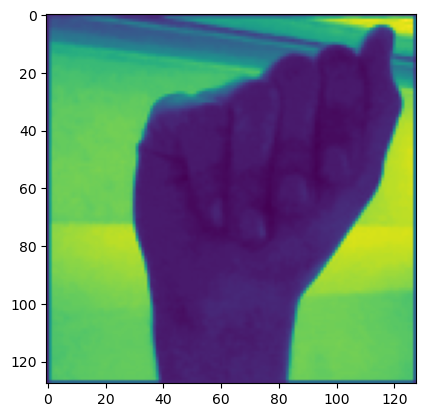

This is  A


In [63]:
n=int(np.random.rand()*10000)

plt.imshow(train_dataset[n][0])
label=train_dataset[n][1]
plt.show()
print('This is ', classes[label])